In [8]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree

projectRoot = Path().resolve().parent
sys.path.append(str(projectRoot))

In [2]:
# loading the raw data file
dataPath = projectRoot / 'data' / 'raw' / 'e_commerce_shopper_behaviour_and_lifestyle.csv'
df = pd.read_csv(dataPath)
df.head()

,user_id,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,has_children,...,cart_items_average,checkout_abandonments_per_month,purchase_conversion_rate,app_usage_frequency,notification_response_rate,account_age_months,last_purchase_date,social_sharing_frequency,premium_subscription,return_rate
0,1,56,Female,Germany,Suburban,90860,Self-employed,Associate Degree,Single,0,...,10,2,62,7,74,19,2025-06-22,6,1,50
1,2,69,Male,Japan,Suburban,35423,Unemployed,Bachelor,Single,1,...,5,7,54,5,23,8,2026-07-25,3,0,37
2,3,46,Female,India,Urban,21467,Self-employed,Associate Degree,Married,1,...,3,3,33,7,12,13,2026-02-26,6,0,53
3,4,32,Male,Canada,Urban,41770,Self-employed,Bachelor,Widowed,0,...,5,9,26,4,19,9,2026-10-27,7,0,98
4,5,60,Female,Japan,Urban,183882,Employed,Associate Degree,Widowed,1,...,8,0,18,7,30,3,2026-06-23,3,0,86


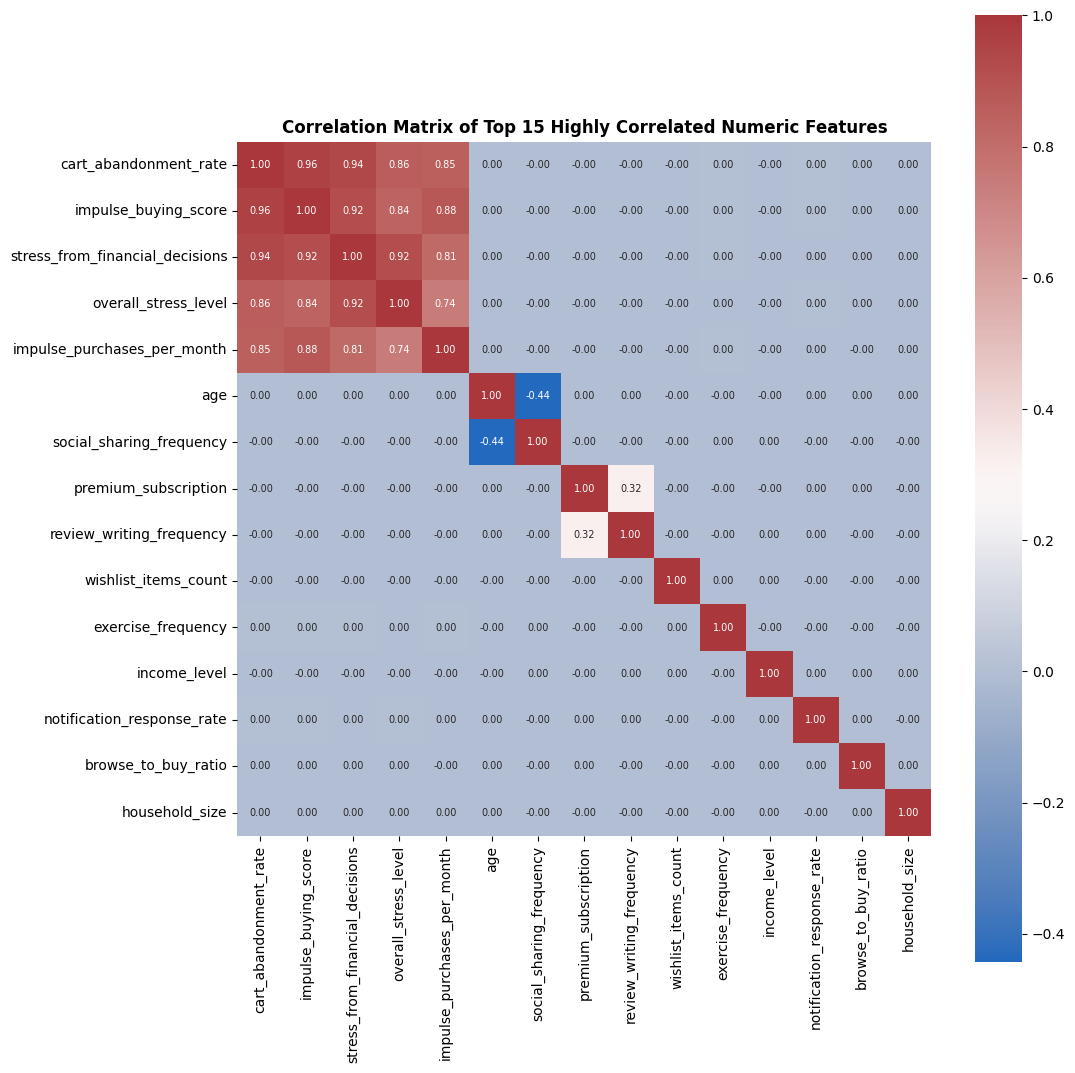

In [3]:
# filtering numeric columns in the data
numeric_cols = df.select_dtypes(include=np.number).columns.to_list()

# target variable
target = 'monthly_spend'

# computing correlation matrix to find out linear relationships between features
corr_matrix = df[numeric_cols].corr()

# top 15 linearly correlated features
top15_features = (
    corr_matrix
    .abs()
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .index
)

corr_matrix_top15 = corr_matrix.loc[top15_features, top15_features]
corr_matrix_top15

# correlation heatmap visualization
plt.figure(figsize = (len(numeric_cols)*0.25, len(numeric_cols)*0.25))
sns.heatmap(
    corr_matrix_top15,
    annot = True,
    fmt = '.2f',
    annot_kws={"size": 7},
    square = True,
    cmap = 'vlag',
)
plt.title('Correlation Matrix of Top 15 Highly Correlated Numeric Features', fontweight = 'bold')
plt.tight_layout()
plt.show()

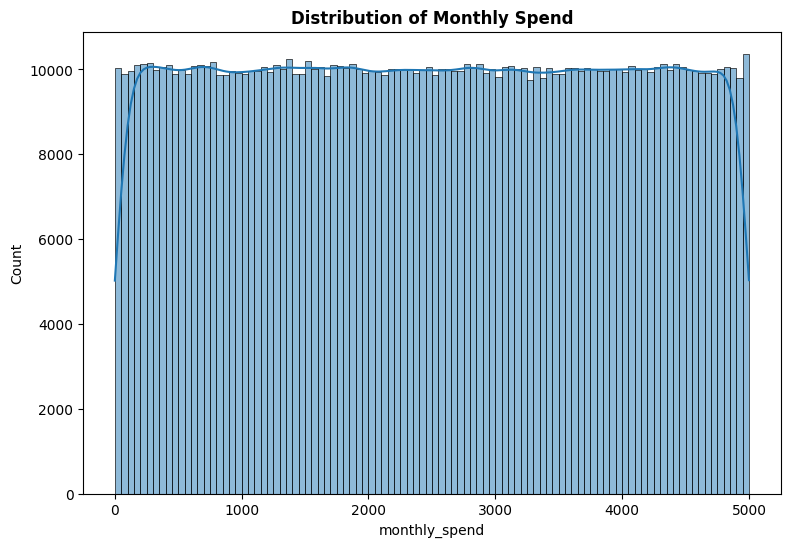

In [4]:
# Visualizing monthly_spend distribution
plt.figure(figsize=(9,6))
sns.histplot(
    df[target],
    kde = True
)
plt.title('Distribution of Monthly Spend', fontweight = 'bold')
plt.show()

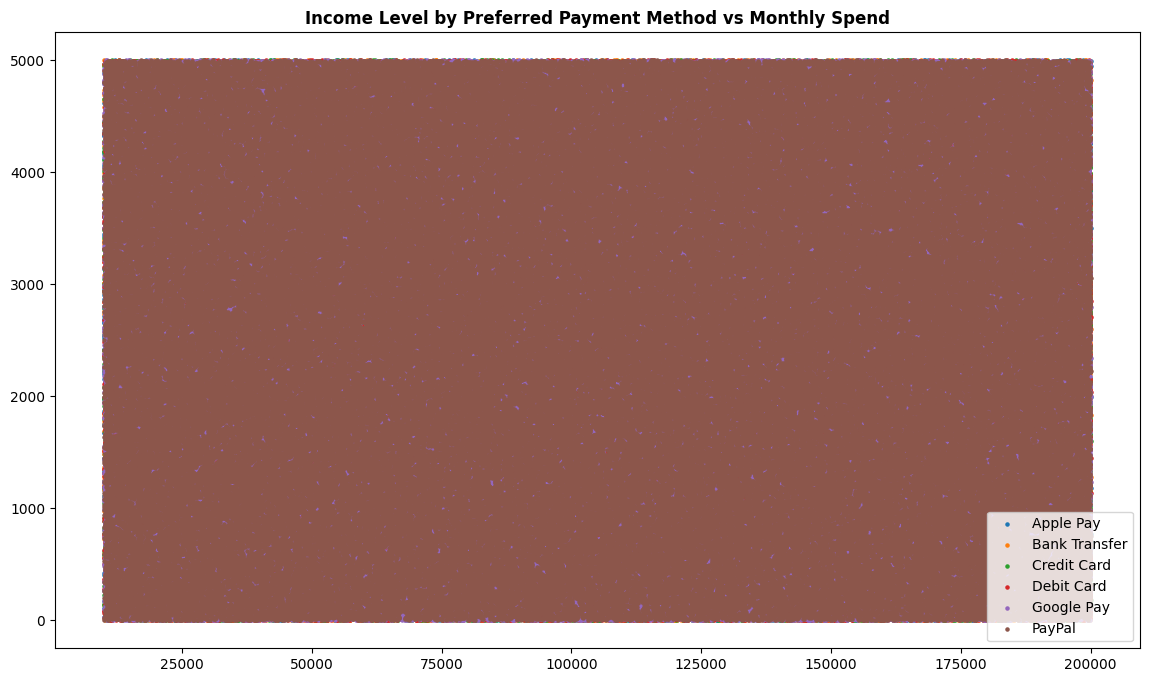

In [5]:
# Visualization of income level x preferred payment method combination on monthly spend
plt.figure(figsize=(14,8))

for label, d in df.groupby('preferred_payment_method'):
    plt.scatter(
        d['income_level'],
        d['monthly_spend'],
        s = 5,
        alpha = 1,
        label = label
    )

plt.title('Income Level by Preferred Payment Method vs Monthly Spend', fontweight = 'bold')
plt.legend(loc='best')
plt.show()

EDA of target variable doesn't give much information on what would be a possible driver of monthly spend.

In [14]:
# building decision tree regressor on the target variable
X = df[numeric_cols]
y = df[target]

tree = DecisionTreeRegressor(
    max_depth=3,
    min_samples_leaf=50,
    random_state=7
)
tree.fit(X, y)

importances = pd.Series(
    tree.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)

monthly_spend                      1.0
user_id                            0.0
ad_clicks_per_day                  0.0
exercise_frequency                 0.0
stress_from_financial_decisions    0.0
overall_stress_level               0.0
sleep_quality                      0.0
physical_activity_level            0.0
mental_health_score                0.0
daily_session_time_minutes         0.0
dtype: float64

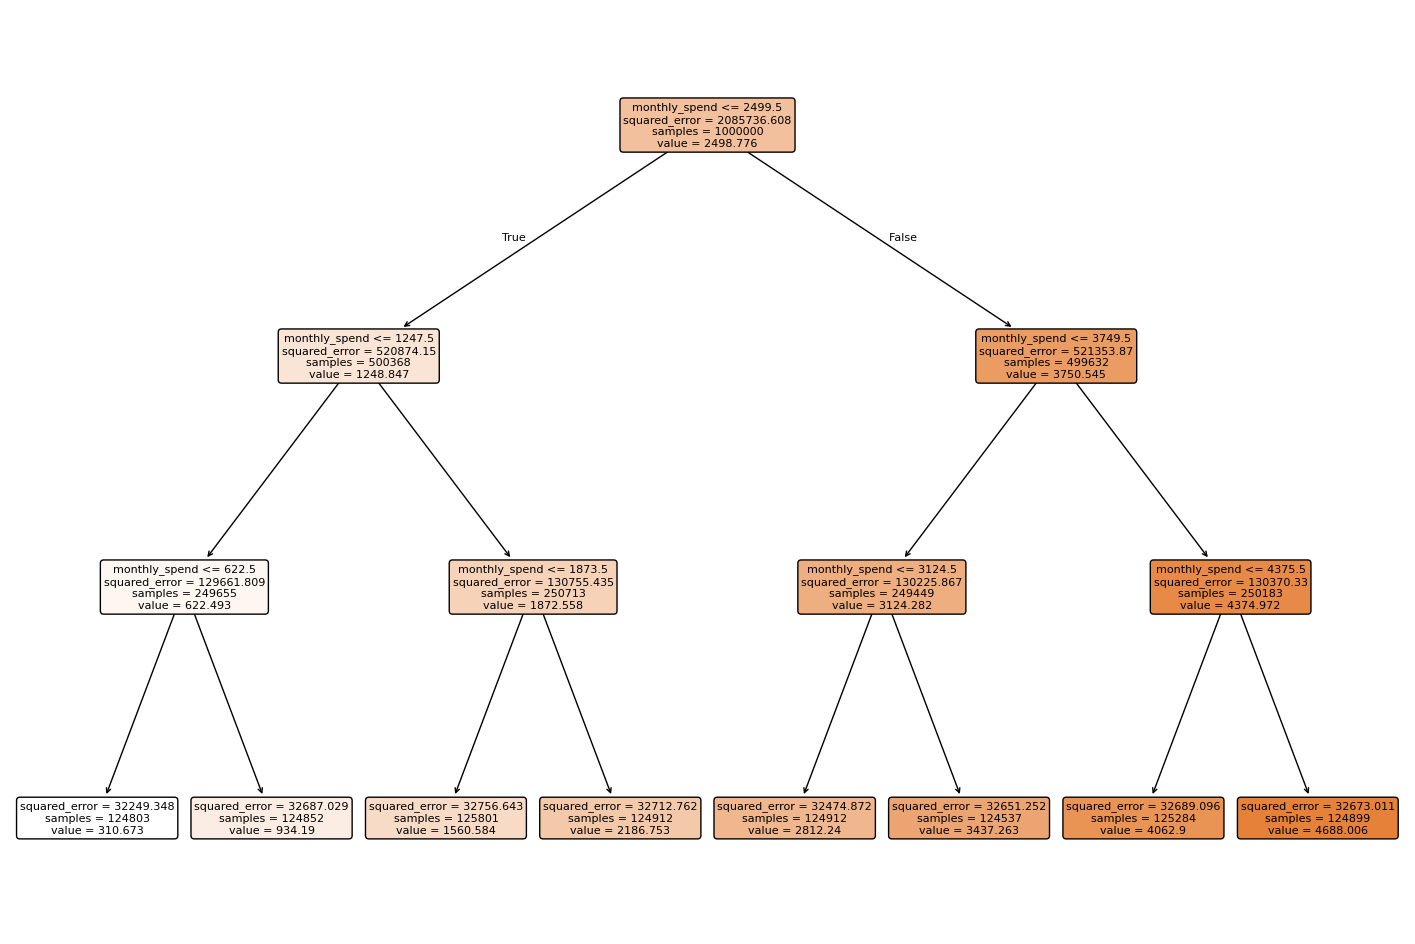

In [16]:
# visualizing the decision tree
plt.figure(figsize=(18,12))
plot_tree(
    tree,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
plt.show()